Import necessary packages, define file libraries, define runs

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import numpy as np
import rasterio
import pandas as pd
import nc_time_axis

# set path to output files 
path = '//clusterfs/biodiversity/annavo/LPJmL56Fit/'

# Single Logging vs. None
runs = ['tapajos_none','tapajos_mort0.04_dbh0.5_single'] # Tapajos

runs = ['paracou_none','paracou_mort0.04_dbh0.5_single'] # Paracou

# Different Logging Time Cycles vs. None
runs = ['tapajos_none','tapajos_mort0.04_dbh0.5_single', 'tapajos_mort0.04_dbh0.5_50yr', 'tapajos_mort0.04_dbh0.5_25yr'] # Tapajos
runs = ['paracou_none','paracou_mort0.04_dbh0.5_single', 'paracou_mort0.04_dbh0.5_50yr', 'paracou_mort0.04_dbh0.5_25yr'] # Paracou 

# Different dbh treshold vs. None
runs = ['tapajos_none','tapajos_mort0.04_dbh0.5_50yr','tapajos_mort0.04_dbh0.35_50yr'] # Tapajos
runs = ['paracou_none','paracou_mort0.04_dbh0.5_50yr','paracou_mort0.04_dbh0.35_50yr'] # Paracou

# Different logging_mort vs. None
runs = ['tapajos_none','tapajos_mort0.04_dbh0.5_single', 'tapajos_mort0.12_dbh0.5_single'] # Tapajos
runs = ['paracou_none','paracou_mort0.04_dbh0.5_single', 'paracou_mort0.12_dbh0.5_single'] # Paracou

# File Libraries

# Biomass File (above ground carbon)
output_file_agb = {'agb.nc': 'AGB'}

# Logging Files
output_files_logging = {'num_logging.nc': 'num_logging', 'vol_logging.nc':'vol_logging'} #, 'timber_harvestc.nc': 'timber_harvestc'}
output_files_logging_units = {'num_logging.nc': '1/ha', 'vol_logging.nc':'m³/ha'} #, 'timber_harvestc.nc': 'gC/ha'}
output_files_logging_title = {'num_logging.nc': 'number of trees logged', 'vol_logging.nc':'volume of trees logged'} #, 'timber_harvestc.nc': 'carbon harvested as timber'}


# Trait Files (For Biomass Weighted Trait Mean)
output_files_traits_biomass = {'sla_mass.nc': 'mass_sla', 'wooddens_mass.nc':'mass_wooddens'}
output_files_traits_bins = {'sla_mass.nc': 'sla', 'wooddens_mass.nc':'wooddens'}
output_files_traits_bins_units =  {'sla_mass.nc': 'mm²/mg', 'wooddens_mass.nc':'g/cm³'}
scalings = {'sla_mass.nc': 1000*0.455, 'wooddens_mass.nc': (10**-6) / 0.455}
output_files_traits_title = {'sla_mass.nc': 'Specific Leaf Area', 'wooddens_mass.nc':'Wood Density'}

# Trait Files (For Individual Weighted Trait Mean)
output_files_traits_ind = {'sla_ind.nc': 'num_sla', 'wooddens_ind.nc': 'num_wooddens'}
output_files_traits_ind_bins = {'sla_ind.nc': 'sla', 'wooddens_ind.nc': 'wooddens'}
output_files_traits_ind_bins_units = {'sla_ind.nc': 'mm²/mg', 'wooddens_ind.nc': 'g/cm³'}
ind_scalings = {'sla_ind.nc': 1000 * 0.455, 'wooddens_ind.nc': (10 ** -6) / 0.455}
output_files_traits_ind_title = {'sla_ind.nc': 'Specific Leaf Area', 'wooddens_ind.nc': 'Wood Density'}


Logging Outputs

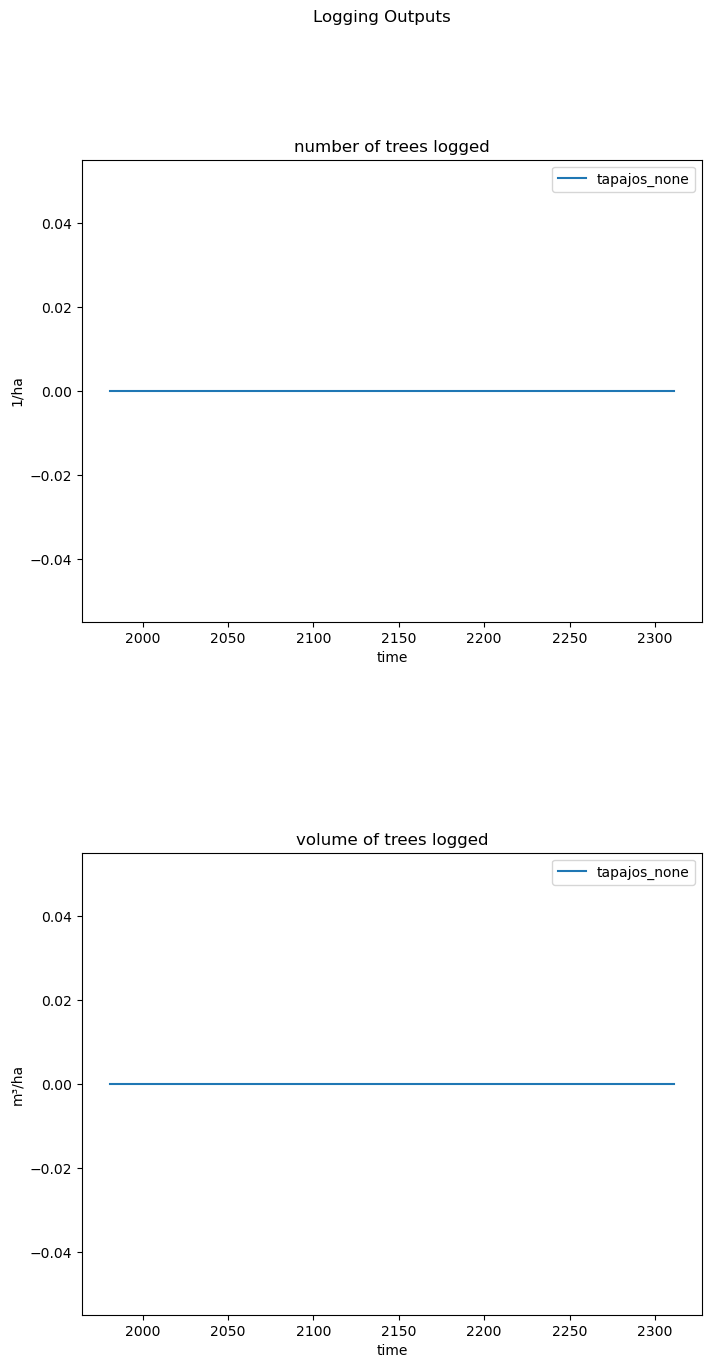

In [9]:
# Create figure and subplots
fig, axs = plt.subplots(len(output_files_logging), 1, figsize=(8, 15))

"""
# Define time slice for plot
start = '2000'
end = '2010'
time_slice = slice(start, end)
"""

# Loop through output files
for i, file in enumerate(output_files_logging):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        try: 
            ds = xr.open_dataset(os.path.join(path, run, 'output', file))
        except:
            print(f"Error opening {os.path.join(path, run, 'output', file)}")
            continue
        variable = output_files_logging[file]
        unit = output_files_logging_units[file]
        title = output_files_logging_title[file]
        ds_variable = ds[variable] * 10000  # from 1/m² to 1/ha
        # if time_slice is defined above use code in line below and put # in front of code in line above 
        # ds_variable = ds[variable].sel(time=time_slice) * 10000  # from 1/m² to 1/ha 
        ds_variable.plot(ax=axs[i], label=run)

    # Set title and legend for subplot
    axs[i].set_title(title)
    axs[i].legend()

    # Set axis labels for subplot
    axs[i].set_xlabel('time')
    # add ylim for each plot (maybe with list?)
    axs[i].set_ylabel(unit)
    

# Set overall title for figure
fig.suptitle('Logging Outputs')

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.5)
plt.show()

AGB Output for distinct years

In [27]:
import xarray as xr
import os

# Set the run you want to analyze
run = 'tapajos_none'

# Construct the file path
filepath = os.path.join('//clusterfs/biodiversity/annavo/LPJmL56Fit/', run, 'output', 'agb.nc')

# Open the dataset
ds = xr.open_dataset(filepath)

variable = 'AGB'
ds_variable = ds[variable] * 0.001  # convert gC to kgC

# Define the indices for specific years
year_indices = {
    1981: 0,
    2013: 32,
    2017: 36,
    2038: 57,
    2042: 61,
    2063: 82,
    2067: 86,
    2088: 107,
    2092: 111,
    2150: 169,
    2200: 219,
    2250: 269
}

# Print AGB values for specific years
for year, index in year_indices.items():
    year_value = ds_variable.values[index]
    print(f"AGB value for {run} in {year}: {year_value} kgC/m²")




AGB value for tapajos_none in 1981: [[19.786789]] kgC/m²
AGB value for tapajos_none in 2013: [[17.932257]] kgC/m²
AGB value for tapajos_none in 2017: [[17.613682]] kgC/m²
AGB value for tapajos_none in 2038: [[16.414785]] kgC/m²
AGB value for tapajos_none in 2042: [[16.360662]] kgC/m²
AGB value for tapajos_none in 2063: [[16.820145]] kgC/m²
AGB value for tapajos_none in 2067: [[16.744062]] kgC/m²
AGB value for tapajos_none in 2088: [[16.6202]] kgC/m²
AGB value for tapajos_none in 2092: [[17.17967]] kgC/m²
AGB value for tapajos_none in 2150: [[16.319263]] kgC/m²
AGB value for tapajos_none in 2200: [[15.473443]] kgC/m²
AGB value for tapajos_none in 2250: [[15.190833]] kgC/m²


AGB Mean and Std Dev over time intervals (Table)

In [53]:
import xarray as xr
import os
import numpy as np
from tabulate import tabulate

# Set the run you want to analyze
run = 'paracou_mort0.04_dbh0.35_50yr'

# Construct the file path
filepath = os.path.join('//clusterfs/biodiversity/annavo/LPJmL56Fit/', run, 'output', 'agb.nc')

# Open the dataset
ds = xr.open_dataset(filepath)

variable = 'AGB'
ds_variable = ds[variable] * 0.001  # convert gC to kgC

# Define the indices for specific years
year_indices = {
    1981: 0,
    2010: 29,
    2013: 32,
    2017: 36,
    2020: 39,   
    2035: 54,
    2038: 57,
    2042: 61,
    2045: 64,
    2060: 79,    
    2063: 82,
    2067: 86,
    2070: 89,
    2085: 104,   
    2088: 107,
    2092: 111,
    2095: 114,  
    2145: 165,   
    2150: 169,
    2195: 214,
    2200: 219,
    2245: 264,   
    2250: 269,
    2295: 314,
    2300: 319

}

# Define the intervals using start and end year indices
intervals = {
    '2010-2013': (year_indices[2010], year_indices[2013]),
    '2017-2020': (year_indices[2017], year_indices[2020]),
    '2035-2038': (year_indices[2035], year_indices[2038]),
    '2042-2045': (year_indices[2042], year_indices[2045]),
    '2060-2063': (year_indices[2060], year_indices[2063]),
    '2067-2070': (year_indices[2067], year_indices[2070]),
    '2085-2088': (year_indices[2085], year_indices[2088]),
    '2092-2095': (year_indices[2092], year_indices[2095]),
    '2145-2150': (year_indices[2145], year_indices[2150]),
    '2195-2200': (year_indices[2195], year_indices[2200]),
    '2245-2250': (year_indices[2245], year_indices[2250]),
    '2295-2300': (year_indices[2295], year_indices[2300])
}

# Prepare data for tabular format
table_data = []
for interval, (start_index, end_index) in intervals.items():
    agb_values_interval = ds_variable.values[start_index:end_index + 1]
    mean_agb_interval = np.mean(agb_values_interval)
    std_dev_agb_interval = np.std(agb_values_interval)
    table_data.append([interval, mean_agb_interval, std_dev_agb_interval])

# Print table
table_headers = ["Interval", "Mean AGB (kgC/m²)", "Std Dev AGB"]
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))


+------------+---------------------+---------------+
| Interval   |   Mean AGB (kgC/m²) |   Std Dev AGB |
+============+=====================+===============+
| 2010-2013  |            18.5315  |     0.144966  |
+------------+---------------------+---------------+
| 2017-2020  |             9.94088 |     0.263216  |
+------------+---------------------+---------------+
| 2035-2038  |            12.3259  |     0.0184014 |
+------------+---------------------+---------------+
| 2042-2045  |            12.4056  |     0.101799  |
+------------+---------------------+---------------+
| 2060-2063  |            12.5822  |     0.130275  |
+------------+---------------------+---------------+
| 2067-2070  |            10.873   |     0.16615   |
+------------+---------------------+---------------+
| 2085-2088  |            12.3488  |     0.0946085 |
+------------+---------------------+---------------+
| 2092-2095  |            12.5619  |     0.0597508 |
+------------+---------------------+----------

Biomass Outputs (AGB) (Plot)

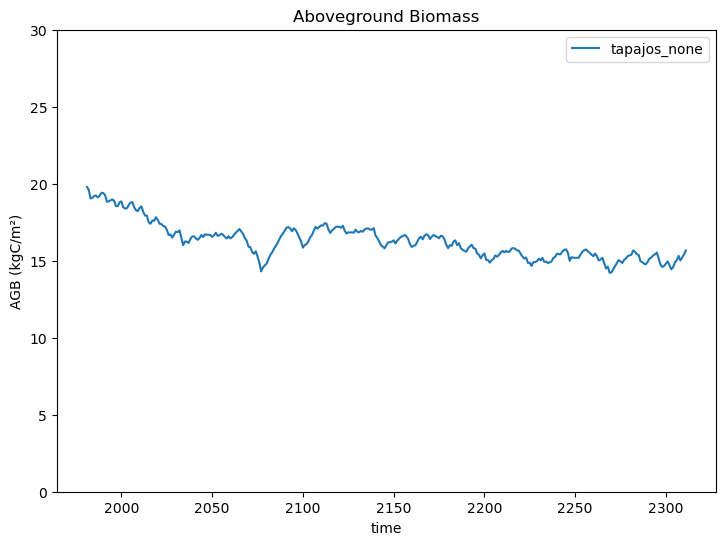

In [28]:
# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(8.5, 6))

# Loop through output files
for i, file in enumerate(output_file_agb):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # check whether files open or not
        try: 
            ds = xr.open_dataset(os.path.join(path, run, 'output', file))
        except:
            print(f"Error opening {os.path.join(path, run, 'output', file)}")
            continue
        variable = output_file_agb[file]
        ds_variable = ds[variable] * 0.001  # convert gC to kgC
           
        ds_variable.plot(ax=axs, label=run)  # Remove indexing from axs

    # Set title and legend for subplot
    plt.title('Aboveground Biomass')
    plt.legend()

    # Set axis labels for subplot
    plt.xlabel('time')
    plt.ylabel(variable + ' (kgC/m²)')
    plt.ylim(0, 30)

plt.show()


Trait Mean (Biomass weighted)

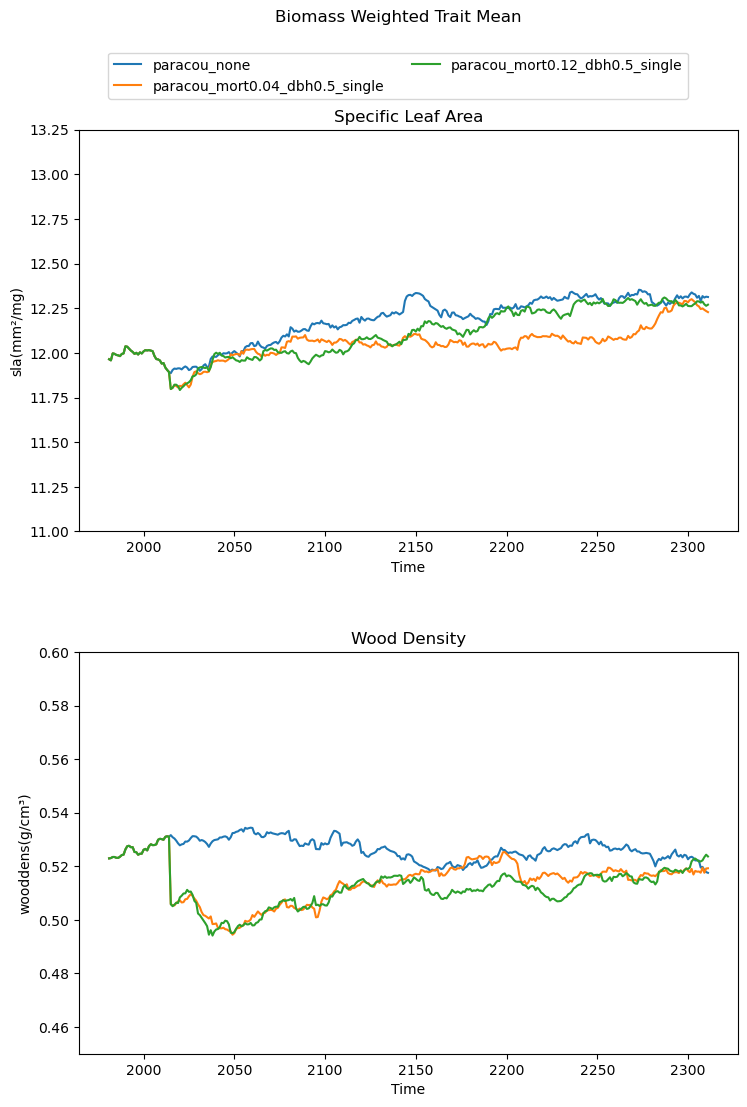

In [113]:
# Create figure and subplots
fig, axs = plt.subplots(len(output_files_traits_biomass), 1, figsize=(8.5, 12))

# Loop through each output file
for i, file in enumerate(output_files_traits_biomass):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        trait_variable = output_files_traits_biomass[file]
        ds[trait_variable] *= 0.001  # Convert gC/m² to kgC/m²

        # Scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_traits_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * scalings[file]

        # Drop old bins_variable and add scaled version
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of biomass
        weights = ds[output_files_traits_biomass[file]]
        trait_variable = output_files_traits_bins[file]

        # Calculate weighted mean of the biomass variable
        biomass_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_traits_bins[file])

        # Compute value of the weighted mean
        biomass_weighted_dataarray = biomass_weighted_dataarray.compute()

        # Plot data
        biomass_weighted_dataarray.plot(ax=axs[i], label=run)

    # Set title and y-axis limits for subplot
    axs[i].set_title(output_files_traits_title[file])
    if file == 'sla_mass.nc':
        axs[i].set_ylim(11, 13.25)
    elif file == 'wooddens_mass.nc':
        axs[i].set_ylim(0.45, 0.6)

    # Set axis labels for subplot
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel(output_files_traits_bins[file] + '(' + output_files_traits_bins_units[file] + ')')

# Set overall title for figure
fig.suptitle('Biomass Weighted Trait Mean')

# Create a single legend at the beginning of plots
legend_labels = [run for run in runs]
fig.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.3)
plt.show()


Trait Mean (Individual weighted)

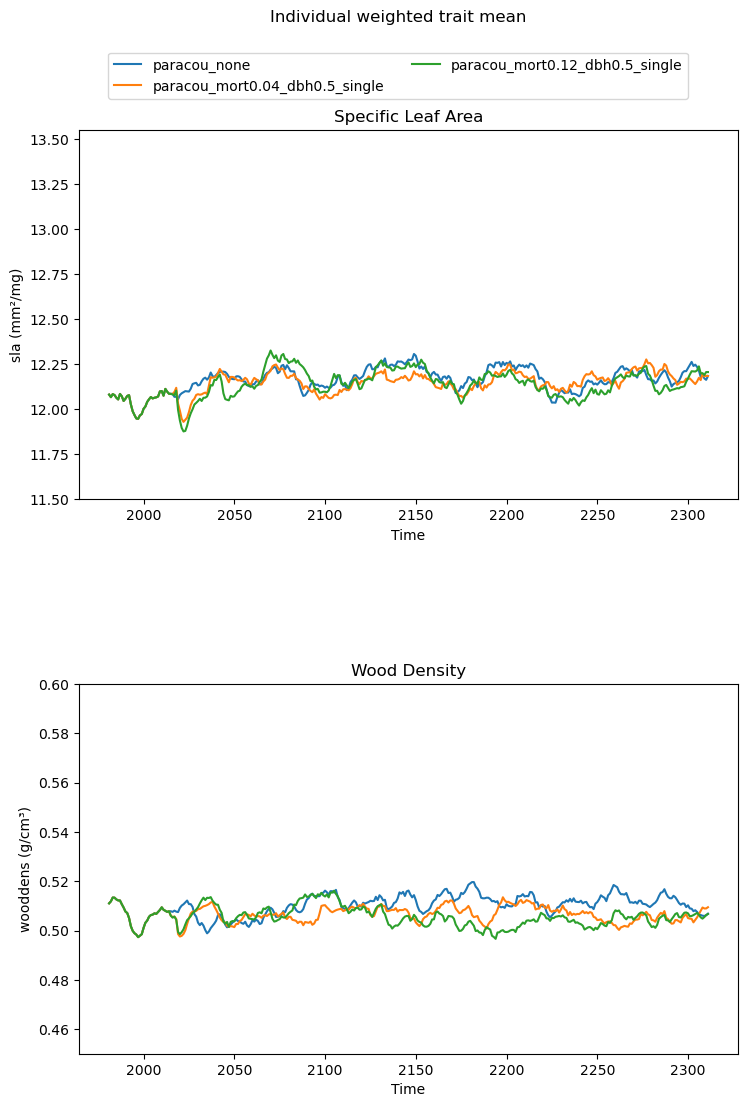

In [131]:
# Create figure and subplots
fig, axs = plt.subplots(len(output_files_traits_ind), 1, figsize=(8.5, 12))

# Loop through output files
for i, file in enumerate(output_files_traits_ind):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Extract variable for trait in the current file and convert to number of trees
        num_trait = output_files_traits_ind[file]
        #ds[num_trait] *= 800  # Convert number of trees in patch to number of trees in entire grid cell (800 patches per grid cell)

        # scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_traits_ind_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * ind_scalings[file]

        # Drop old bins variable and add scaled version
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of trait in the current file
        weights = ds[output_files_traits_ind[file]]
        trait_variable = output_files_traits_ind_bins[file]

        # Calculate weighted mean of the trait variable
        trait_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_traits_ind_bins[file])

        # Compute value of the weighted mean
        trait_weighted_dataarray = trait_weighted_dataarray.compute()

        # Plot data
        trait_weighted_dataarray.plot(ax=axs[i], label=run)

    # Set title and y-axis limits for subplot
    axs[i].set_title(output_files_traits_ind_title[file])
    if file == 'sla_ind.nc':
        axs[i].set_ylim(11.5, 13.55)
    elif file == 'wooddens_ind.nc':
        axs[i].set_ylim(0.45, 0.6)

    # Set axis labels for subplot
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel(output_files_traits_ind_bins[file] + ' (' + output_files_traits_ind_bins_units[file] + ')')

# Set overall title for figure
fig.suptitle('Individual weighted trait mean')
# create single legend at the beginning of plots
legend_labels = [run for run in runs]
fig.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.5)
plt.show()


Trait Shift (Step-Diagram Average Over Multiple Years Pre/Post Logging) - Legend upper center

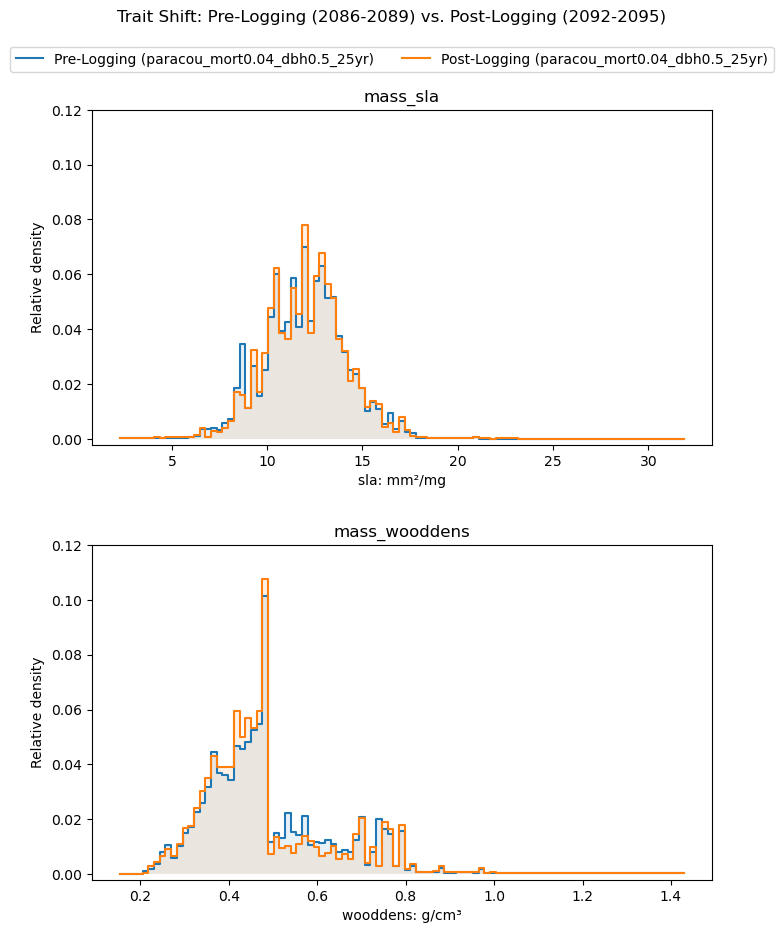

In [4]:
# Define run
run = 'paracou_mort0.04_dbh0.5_25yr'

# Define time range for average pre-logging
pre_firstyear = 2086
pre_lastyear = 2089

# Define time range for average post-logging
post_firstyear = 2092
post_lastyear = 2095

# Create figure and subplots
fig, axs = plt.subplots(len(output_files_traits_biomass), 1, figsize=(8, 10))

# Loop through output files
for i, file in enumerate(output_files_traits_biomass):

    # Open file
    ds = xr.open_dataset(os.path.join(path, run, 'output', file))
    
    # Pre-logging
    pre_ds_last30years = ds.sel(time=slice(str(pre_firstyear), str(pre_lastyear)))
    pre_ds_last30years_mean = pre_ds_last30years.mean(dim='time')
    pre_bins = pre_ds_last30years_mean[output_files_traits_bins[file]][:] * scalings[file]
    pre_biomass = pre_ds_last30years_mean[output_files_traits_biomass[file]][:] * 0.001
    pre_biomass_normalized = pre_biomass / pre_biomass.sum(dim=output_files_traits_bins[file])
    if i == 0:
        axs[i].step(pre_bins, pre_biomass_normalized.values.ravel(), where='post', label=('Pre-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs[i].step(pre_bins, pre_biomass_normalized.values.ravel(), where='post')
    axs[i].fill_between(pre_bins, pre_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Post-logging
    post_ds_last30years = ds.sel(time=slice(str(post_firstyear), str(post_lastyear)))
    post_ds_last30years_mean = post_ds_last30years.mean(dim='time')
    post_bins = post_ds_last30years_mean[output_files_traits_bins[file]][:] * scalings[file]
    post_biomass = post_ds_last30years_mean[output_files_traits_biomass[file]][:] * 0.001
    post_biomass_normalized = post_biomass / post_biomass.sum(dim=output_files_traits_bins[file])
    if i == 0:
        axs[i].step(post_bins, post_biomass_normalized.values.ravel(), where='post', label=('Post-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs[i].step(post_bins, post_biomass_normalized.values.ravel(), where='post')
    axs[i].fill_between(post_bins, post_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Set title and axis labels
    axs[i].set_title(output_files_traits_biomass[file])
    axs[i].set_xlabel(output_files_traits_bins[file] + ': ' + output_files_traits_bins_units[file])
    axs[i].set_ylim(-0.002, 0.12)
    axs[i].set_ylabel('Relative density')

# Set overall title for figure
fig.suptitle('Trait Shift: Pre-Logging (' + str(pre_firstyear) + '-' + str(pre_lastyear) + ') vs. Post-Logging (' + str(post_firstyear) + '-' + str(post_lastyear) + ')')

# Display legend with labels for the step lines
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.3)
plt.show()


Trait Shift (Step-Diagram Average Over Multiple Years Pre/Post Logging) - Legend inside plots

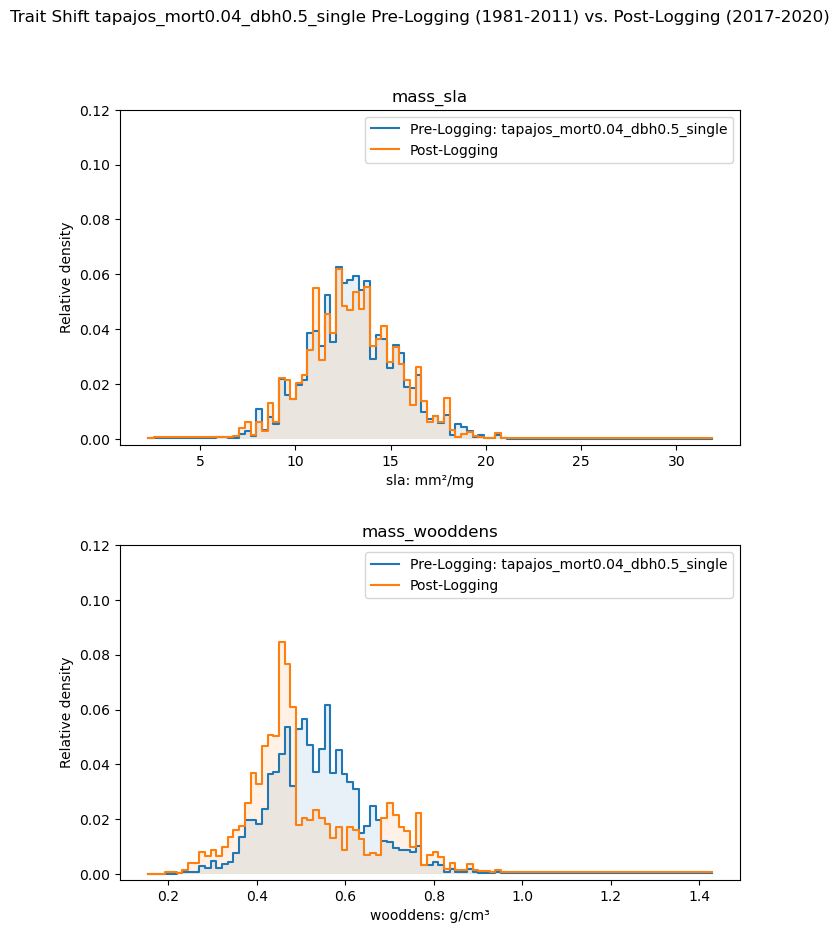

In [173]:
# Define run
run = 'tapajos_mort0.04_dbh0.5_single'

# Define time range for average pre-logging
pre_firstyear = 1981
pre_lastyear = 2011

# Define time range for average post-logging
post_firstyear = 2017
post_lastyear = 2020

# Create figure and subplots
fig, axs = plt.subplots(len(output_files_traits_biomass), 1, figsize=(8, 10))

# Loop through output files
for i, file in enumerate(output_files_traits_biomass):

    # Open file
    ds = xr.open_dataset(os.path.join(path, run, 'output', file))
    
    # Pre-logging
    pre_ds_last30years = ds.sel(time=slice(str(pre_firstyear), str(pre_lastyear)))
    pre_ds_last30years_mean = pre_ds_last30years.mean(dim='time')
    pre_bins = pre_ds_last30years_mean[output_files_traits_bins[file]][:] * scalings[file]
    pre_biomass = pre_ds_last30years_mean[output_files_traits_biomass[file]][:] * 0.001
    pre_biomass_normalized = pre_biomass / pre_biomass.sum(dim=output_files_traits_bins[file])
    axs[i].step(pre_bins, pre_biomass_normalized.values.ravel(), where='post', label=('Pre-Logging: ' + run)) # Only add label to legend once
    axs[i].fill_between(pre_bins, pre_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Post-logging
    post_ds_last30years = ds.sel(time=slice(str(post_firstyear), str(post_lastyear)))
    post_ds_last30years_mean = post_ds_last30years.mean(dim='time')
    post_bins = post_ds_last30years_mean[output_files_traits_bins[file]][:] * scalings[file]
    post_biomass = post_ds_last30years_mean[output_files_traits_biomass[file]][:] * 0.001
    post_biomass_normalized = post_biomass / post_biomass.sum(dim=output_files_traits_bins[file])
    axs[i].step(post_bins, post_biomass_normalized.values.ravel(), where='post', label='Post-Logging') # Only add label to legend once
    axs[i].fill_between(post_bins, post_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Set title and axis labels
    axs[i].set_title(output_files_traits_biomass[file])
    axs[i].set_xlabel(output_files_traits_bins[file] + ': ' + output_files_traits_bins_units[file])
    axs[i].set_ylim(-0.002, 0.12)
    axs[i].set_ylabel('Relative density')
    
    # Display legend with run label for the step lines within the subplot
    axs[i].legend(loc='upper right')

# Set overall title for figure
fig.suptitle('Trait Shift ' + run + ' Pre-Logging (' + str(pre_firstyear) + '-' + str(pre_lastyear) + ') vs. Post-Logging (' + str(post_firstyear) + '-' + str(post_lastyear) + ')')

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.3)
plt.show()
